In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)  # (50K,32,32,3) - (num of images - 50k, height-32,width-32, ch=3)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

#### Appraoch - 1, 
loss - sparse_categorical_crossentropy

In [5]:
y_train1 = y_train.reshape(50000)
y_test1 = y_test.reshape(10000)
print(y_train1.shape)
print(y_test1.shape)

(50000,)
(10000,)


In [6]:
print(set(y_train1))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
labels = {'airplane' 2: 0,'automobile' : 1, 'bird':2,'cat' : 3,
    'deer' : 4, 'dog' : 5,'frog' : 6,'horse' : 7,'ship' : 8,'truck' : 9}
labels = {v:k for k,v in labels.items()}
print(labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [8]:
ypred = np.random.randint(0,10)
labels[ypred]

'dog'

#### Approach - 2
categorical_crossentropy

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)
print(y_train2.shape)
print(y_test2.shape)

(50000, 10)
(10000, 10)


In [12]:
y_train2[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Plot

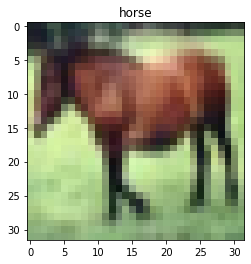

In [15]:
plt.imshow(x_train[7])
# plt.title(f'{y_train[7]},{y_train[7][0]}')
plt.title(labels[y_train1[7]])
plt.show()

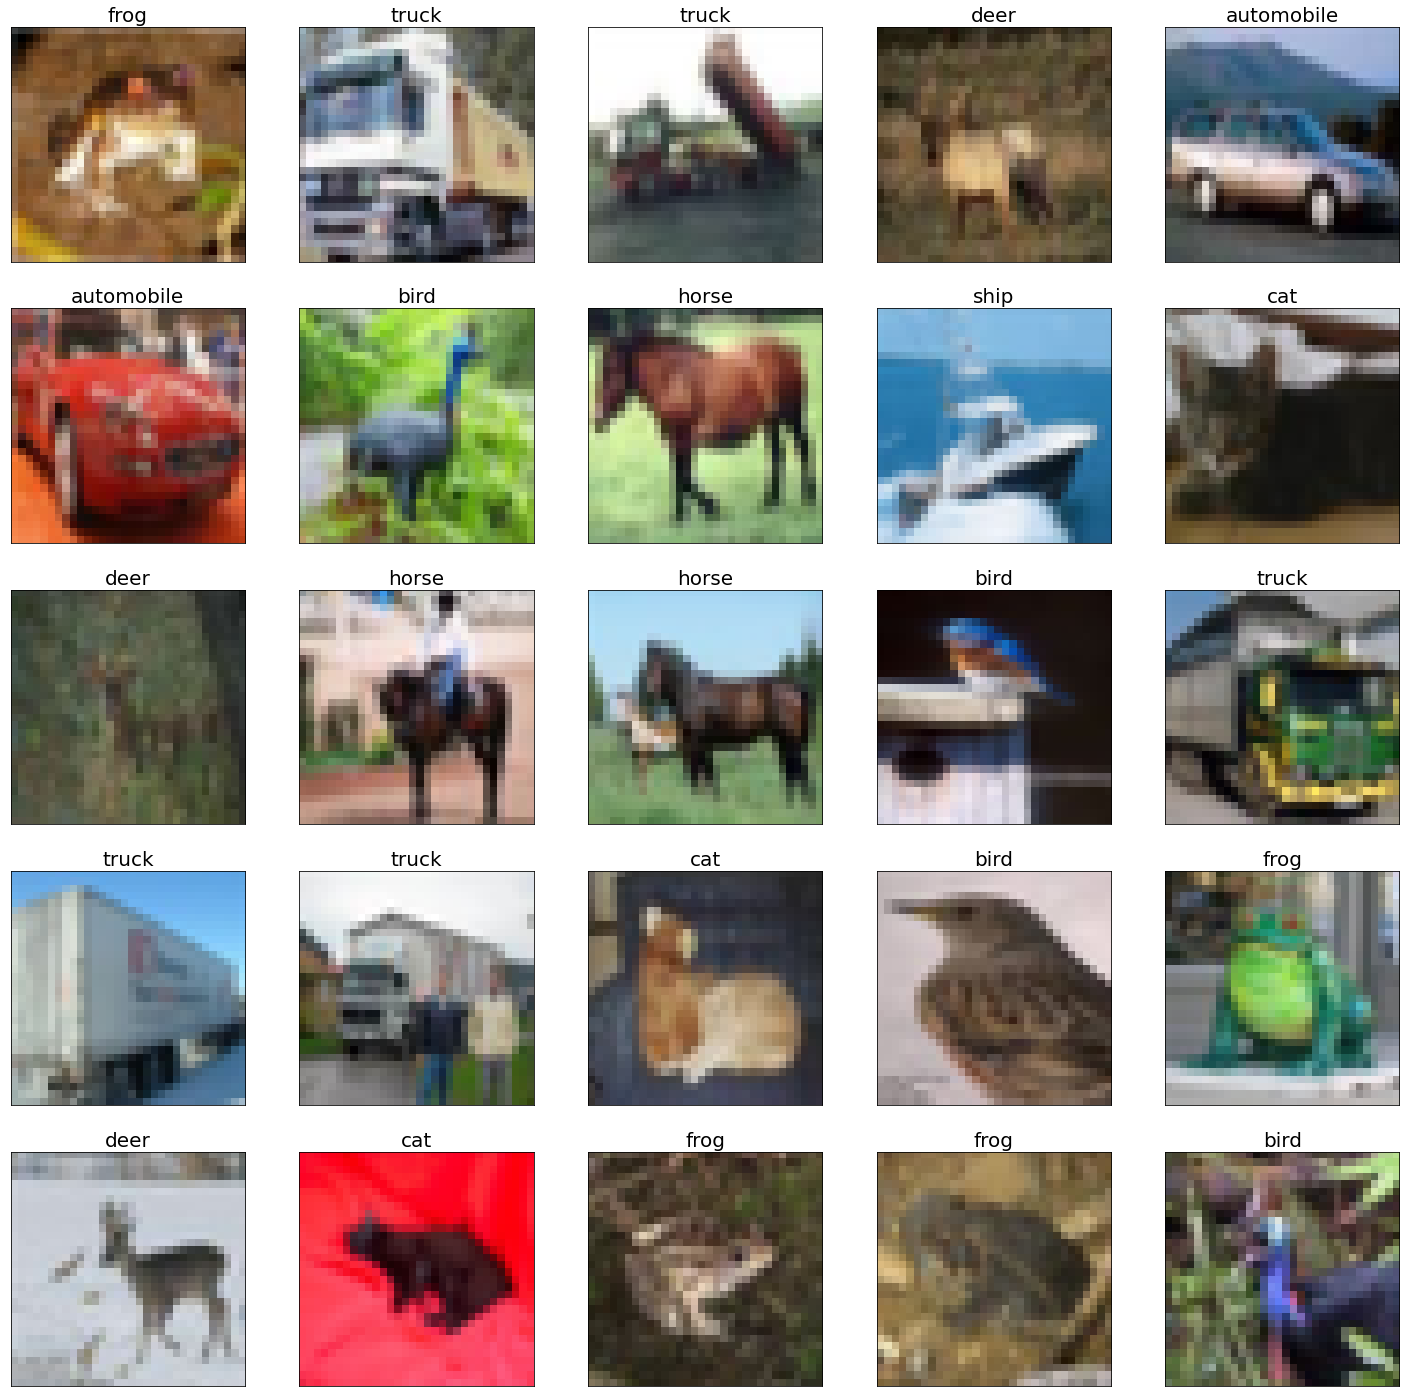

In [16]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(labels[y_train1[i]],fontsize=20)
plt.show()

In [17]:
x_train  = x_train[:10000,:,:]
y_train1 = y_train1[:10000]
x_test = x_test[:3000,:,:]
y_test1 = y_test1[:3000]
print(x_train.shape)
print(x_test.shape)
print(y_train1.shape)
print(y_test1.shape)

(10000, 32, 32, 3)
(3000, 32, 32, 3)
(10000,)
(3000,)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [24]:
m1 = Sequential()

m1.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)))
m1.add(MaxPooling2D(pool_size =(2,2)))

m1.add(Conv2D(16,(3,3),activation = 'relu',input_shape=(32,32,3)))
m1.add(MaxPooling2D(pool_size =(2,2)))

m1.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(32,32,3)))
m1.add(MaxPooling2D(pool_size =(2,2)))


m1.add(Flatten())
m1.add(Dense(64,activation ='relu'))
m1.add(Dense(10,activation ='softmax'))


m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

m1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [25]:
h1 = m1.fit(x_train,y_train1,epochs=30,validation_data=(x_test,y_test1))

Epoch 1/30
313/313 [==============================] - 6s 16ms/step - loss: 2.4650 - acc: 0.1969 - val_loss: 1.9892 - val_acc: 0.2587
Epoch 2/30
313/313 [==============================] - 5s 16ms/step - loss: 1.8805 - acc: 0.3111 - val_loss: 1.8135 - val_acc: 0.3420
Epoch 3/30
313/313 [==============================] - 5s 16ms/step - loss: 1.7316 - acc: 0.3769 - val_loss: 1.7020 - val_acc: 0.3830
Epoch 4/30
313/313 [==============================] - 5s 16ms/step - loss: 1.6363 - acc: 0.4086 - val_loss: 1.6380 - val_acc: 0.4000
Epoch 5/30
313/313 [==============================] - 5s 16ms/step - loss: 1.5713 - acc: 0.4329 - val_loss: 1.6056 - val_acc: 0.4210
Epoch 6/30
313/313 [==============================] - 5s 15ms/step - loss: 1.4957 - acc: 0.4569 - val_loss: 1.6156 - val_acc: 0.4113
Epoch 7/30
313/313 [==============================] - 5s 15ms/step - loss: 1.4505 - acc: 0.4732 - val_loss: 1.5621 - val_acc: 0.4453
Epoch 8/30
313/313 [==============================] - 5s 16ms/step - 

In [29]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
25,0.695603,0.7512,2.278464,0.458667,25
26,0.687213,0.7578,2.276626,0.447667,26
27,0.628076,0.7783,2.385708,0.447000,27
28,0.648058,0.7700,2.445813,0.436333,28
29,0.644199,0.7727,2.353055,0.465667,29


In [47]:
m2 = Sequential()

m2.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(32,32,3)))
m2.add(MaxPooling2D(pool_size =(2,2)))

m2.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(32,32,3)))
m2.add(MaxPooling2D(pool_size =(2,2)))

m2.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(32,32,3)))
m2.add(MaxPooling2D(pool_size =(2,2)))


m2.add(Flatten())
m2.add(Dense(64,activation ='relu'))
m2.add(Dense(10,activation ='softmax'))


m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

m2.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 4, 4, 64)          73792     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 2, 2, 64)       

In [48]:
h2 = m2.fit(x_train,y_train1,epochs=30,validation_data=(x_test,y_test1))

Epoch 1/30
313/313 [==============================] - 13s 40ms/step - loss: 2.4735 - acc: 0.2525 - val_loss: 1.7900 - val_acc: 0.3503
Epoch 2/30
313/313 [==============================] - 14s 44ms/step - loss: 1.6726 - acc: 0.3958 - val_loss: 1.6455 - val_acc: 0.4173
Epoch 3/30
313/313 [==============================] - 14s 45ms/step - loss: 1.4897 - acc: 0.4651 - val_loss: 1.4707 - val_acc: 0.4703
Epoch 4/30
313/313 [==============================] - 13s 41ms/step - loss: 1.3944 - acc: 0.4974 - val_loss: 1.4550 - val_acc: 0.4880
Epoch 5/30
313/313 [==============================] - 13s 42ms/step - loss: 1.3036 - acc: 0.5393 - val_loss: 1.4103 - val_acc: 0.4987
Epoch 6/30
313/313 [==============================] - 13s 42ms/step - loss: 1.2105 - acc: 0.5690 - val_loss: 1.4223 - val_acc: 0.4910
Epoch 7/30
313/313 [==============================] - 13s 42ms/step - loss: 1.1156 - acc: 0.6008 - val_loss: 1.3907 - val_acc: 0.5210
Epoch 8/30
313/313 [==============================] - 15s 47ms

In [49]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail()

,loss,acc,val_loss,val_acc,Epochs
25,0.260612,0.9105,2.832313,0.528667,25
26,0.245869,0.9164,2.906231,0.542000,26
27,0.224165,0.9225,3.032922,0.532333,27
28,0.259697,0.9145,3.054479,0.520333,28
29,0.230584,0.9235,2.851123,0.543667,29


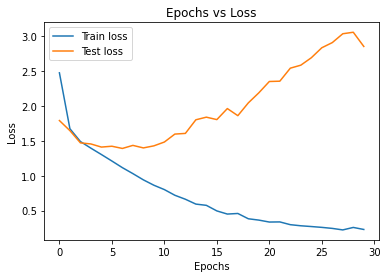

In [50]:
plt.plot(r2['Epochs'],r2['loss'],label='Train loss')
plt.plot(r2['Epochs'],r2['val_loss'],label='Test loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

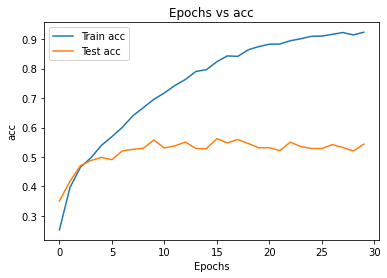

In [51]:
plt.plot(r2['Epochs'],r2['acc'],label='Train acc')
plt.plot(r2['Epochs'],r2['val_acc'],label='Test acc')
plt.title('Epochs vs acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [52]:
ypred = m2.predict(x_test)
ypred[:5]

94/94 [==============================] - 1s 9ms/step


array([[1.8927666e-06, 9.4359677e-08, 3.5590630e-09, 9.9696547e-01,
        8.5805581e-08, 8.5409825e-05, 3.5114986e-09, 9.4775220e-05,
        2.8471667e-03, 5.1769425e-06],
       [1.9827144e-09, 5.4961051e-06, 9.1618497e-15, 3.3541065e-09,
        2.0048414e-18, 2.2488359e-13, 2.0483842e-14, 6.1392941e-17,
        9.9999452e-01, 2.9497620e-11],
       [3.8667750e-01, 2.0440526e-01, 2.2703365e-05, 2.6711093e-03,
        4.8536998e-07, 2.8020522e-04, 3.8459917e-04, 1.6427219e-03,
        1.8385608e-01, 2.2005928e-01],
       [1.1688036e-01, 5.3140275e-06, 9.7354916e-07, 4.4624855e-09,
        7.9552301e-08, 3.2762479e-08, 2.1907050e-08, 1.5958083e-08,
        8.8311327e-01, 1.0458562e-08],
       [1.3080392e-08, 1.4242369e-06, 3.0030108e-06, 2.4109274e-01,
        2.0960979e-02, 1.1871427e-03, 7.3674893e-01, 5.6592908e-06,
        8.5485020e-08, 4.5247610e-08]], dtype=float32)

In [53]:
ypred_m2 = [np.argmax(i) for i in ypred]
print(ypred_m2[:85])

[3, 8, 0, 8, 6, 9, 1, 6, 3, 1, 4, 9, 3, 7, 9, 3, 5, 5, 9, 7, 7, 0, 2, 1, 4, 2, 4, 6, 1, 6, 2, 5, 8, 5, 9, 3, 7, 9, 9, 5, 9, 7, 3, 6, 0, 9, 5, 3, 7, 4, 0, 0, 3, 3, 8, 8, 7, 3, 3, 3, 7, 5, 6, 3, 6, 6, 1, 0, 5, 7, 7, 5, 8, 8, 8, 2, 5, 3, 3, 8, 8, 1, 1, 7, 2]


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(confusion_matrix(y_test1,ypred_m2))
print(classification_report(y_test1,ypred_m2))

[[174  15  14  12  11  10   5  11  33  14]
 [ 10 217   2   8   3   5   3   4  11  24]
 [ 25   5  99  52  46  40  23  11  12   5]
 [ 13   2  16 137  18  63  14  17   7   8]
 [ 18   3  21  40 132  17  17  37  11   3]
 [  9   4   7  63  19 147  16  17   4   4]
 [  4   5  16  51  21  21 174   5   4   6]
 [ 12   6   9  23  33  28   4 162   4   5]
 [ 55  17   7  12   3   4   1   3 196  18]
 [ 22  38   2  15   0   3   5   6  19 193]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       299
           1       0.70      0.76      0.72       287
           2       0.51      0.31      0.39       318
           3       0.33      0.46      0.39       295
           4       0.46      0.44      0.45       299
           5       0.43      0.51      0.47       290
           6       0.66      0.57      0.61       307
           7       0.59      0.57      0.58       286
           8       0.65      0.62      0.64       316
           9       0.69     

In [56]:
def test_img_pred(img_idx):
    test_img = x_test[img_idx].reshape(1,32,32,3)
    pred = m2.predict(test_img)  # 2D numpy array
    res = np.argmax(pred[0])
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx])
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Test Image {img_idx}')
    plt.xlabel(f'Actual Val: {labels[y_test1[img_idx]]}\nPrediced val {labels[res]}')
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.xticks(np.arange(10))
    plt.title('Prediction Probability')
    plt.show()

1/1 [==============================] - 0s 16ms/step


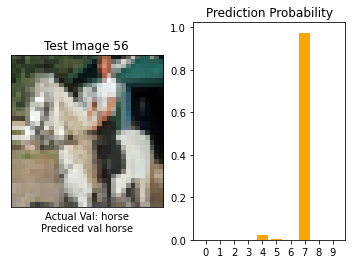

In [57]:
test_img_pred(56)

1/1 [==============================] - 0s 16ms/step


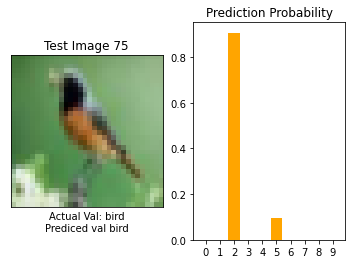

In [58]:
test_img_pred(75)

1/1 [==============================] - 0s 17ms/step


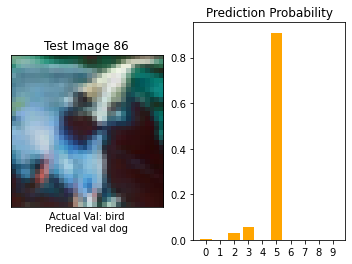

In [59]:
test_img_pred(86)

1/1 [==============================] - 0s 16ms/step


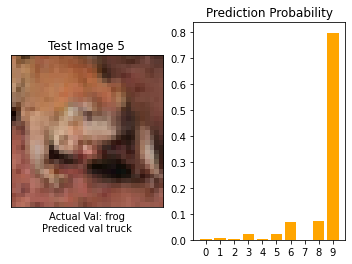

In [60]:
test_img_pred(5)

1/1 [==============================] - 0s 16ms/step


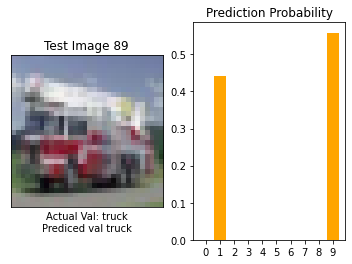

In [61]:
test_img_pred(89)

In [65]:
m2.save('Cifar10.h1')

INFO:tensorflow:Assets written to: Cifar10.h1\assets


INFO:tensorflow:Assets written to: Cifar10.h1\assets
